# Case Study: Cyclistic Bike-Share

Amitesh 2024-06-10

### About the Company
Cyclistic is a bike sharing company that has a network of docking stations spread all across chicago. A bike can be picked up from any station and can be returned back to the same station or any other cyclistic station. They are known in the market for their versatility as they provide multiple price options and bike choices as per the needs and the convenience of their users.

### Deliverable: Business Task
The director of marketing has a hypothesis that in order to grow their revenue they need people to purchase more annual memberships and for this to happen, they want to convert more casual customers to annual members. My team needs to figure out how casual and annual members use Cyclistic bikes differently so that we can create a new strategy for marketing. These insights need to be backed by data in order to get approval from the executive team.

<b>Stakeholder Expectations</b>
- Executive Team: Insights that are backed by real world data and can help to grow the company.
- Director of marketing: Data driven evidence to back up her hypothesis and recommendations.


### Deliverable: Collection and preparation of data

<b>Understanding the dataset:</b>
- Dataset Source: Data was provided through a repository held online.
- Data Context: The data was collected to analyze it for potential insights regarding growth of the company.
- Data Documentation: No documentation was provided about the data

<b>Initial Data Exploration:</b>
- Loading the data: Python programming language inside Visual Studio Code IDE was used to manipulate data was used to handle the data.
- Data integration: Data was divided into twelve different datasets each representing a month’s worth of data. All of the datasets were combined together to form a single dataset representing a whole year.
- Initial preview: After a first look at the data, the variables provided are of quantitative nature such as station name, ride id, rideable type, date and time, member type and more.

<b>Data Quality Assessment:</b>
- Reliable: Data is not 100% reliable since it contains missing values and inconsistencies.
- Original: Dataset is original as it is provided by the organization handling bike shares.
- Comprehensive: The dataset mostly contains everything required for the analysis.
- Current: Time frame of the dataset is relevant to the analysis.

<b>Loading and Initial Inspection of data</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_jan = pd.read_csv(r"D:\1.Work\DataAnalytics\Portfolio Projects\Cyclistic Bike Share\RawData\JanDataRaw.csv")
df_feb = pd.read_csv(r"D:\1.Work\DataAnalytics\Portfolio Projects\Cyclistic Bike Share\RawData\FebDataRaw.csv")
df_march = pd.read_csv(r"D:\1.Work\DataAnalytics\Portfolio Projects\Cyclistic Bike Share\RawData\MarDataRaw.csv")
df_april = pd.read_csv(r"D:\1.Work\DataAnalytics\Portfolio Projects\Cyclistic Bike Share\RawData\AprilDataRaw.csv")
df_may = pd.read_csv(r"D:\1.Work\DataAnalytics\Portfolio Projects\Cyclistic Bike Share\RawData\MayDataRaw.csv")
df_june = pd.read_csv(r"D:\1.Work\DataAnalytics\Portfolio Projects\Cyclistic Bike Share\RawData\JuneDataRaw.csv")
df_july = pd.read_csv(r"D:\1.Work\DataAnalytics\Portfolio Projects\Cyclistic Bike Share\RawData\JulyDataRaw.csv")
df_aug = pd.read_csv(r"D:\1.Work\DataAnalytics\Portfolio Projects\Cyclistic Bike Share\RawData\AugDataRaw.csv")
df_sept = pd.read_csv(r"D:\1.Work\DataAnalytics\Portfolio Projects\Cyclistic Bike Share\RawData\SeptDataRaw.csv")
df_oct = pd.read_csv(r"D:\1.Work\DataAnalytics\Portfolio Projects\Cyclistic Bike Share\RawData\OctDataRaw.csv")
df_nov = pd.read_csv(r"D:\1.Work\DataAnalytics\Portfolio Projects\Cyclistic Bike Share\RawData\NovDataRaw.csv")
df_dec = pd.read_csv(r"D:\1.Work\DataAnalytics\Portfolio Projects\Cyclistic Bike Share\RawData\DecDataRaw.csv")

In [3]:
# Finding total number of rows from all the datasets
data = [df_jan, df_feb, df_march, df_april, df_may, df_june, df_july, df_aug, df_sept, df_oct, df_nov, df_dec]

rows = 0
for x in range(0, len(data)):
    dataframe = data[x]
    rows = rows + dataframe.shape[0]

print("Total number of rows:",rows)

Total number of rows: 5719877


In [4]:
# Checking if all the datasets have same number of columns
for x in range(0, len(data)):
    print(dataframe.shape[1], end=" ")

13 13 13 13 13 13 13 13 13 13 13 13 

In [5]:
# Combining the data into a single dataframe
CyclisticDataRaw = pd.concat(data)
print(CyclisticDataRaw.shape)

(5719877, 13)


In [6]:
CyclisticDataRaw.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [8]:
CyclisticDataRaw.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
224068,F74DF9549B504A6B,electric_bike,2023-12-07 13:15:24,2023-12-07 13:17:37,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874702,-87.649804,41.874640,-87.657030,casual
224069,BCDA66E761CC1029,classic_bike,2023-12-08 18:42:21,2023-12-08 18:45:56,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual
224070,D2CF330F9C266683,classic_bike,2023-12-05 14:09:11,2023-12-05 14:13:01,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,member
224071,3829A0D1E00EE970,electric_bike,2023-12-02 21:36:07,2023-12-02 21:53:45,Damen Ave & Madison St,13134,Morgan St & Lake St*,chargingstx4,41.881396,-87.674984,41.885492,-87.652289,casual
224072,A373F5B447AEA508,classic_bike,2023-12-11 13:07:46,2023-12-11 13:11:24,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,member


There is something interesting to notice here. We know that our dataframe has more than 5 million records but if we pay attention to the index of the last record shown above, it ends at 224k. This suggests that there might a problem of duplicate indexes so let us solve it now.

In [9]:
# Fixing duplicated indexes
CyclisticDataRaw = CyclisticDataRaw.reset_index(drop=True)

In [13]:
CyclisticDataRaw.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
5719872,F74DF9549B504A6B,electric_bike,2023-12-07 13:15:24,2023-12-07 13:17:37,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874702,-87.649804,41.874640,-87.657030,casual
5719873,BCDA66E761CC1029,classic_bike,2023-12-08 18:42:21,2023-12-08 18:45:56,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual
5719874,D2CF330F9C266683,classic_bike,2023-12-05 14:09:11,2023-12-05 14:13:01,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,member
5719875,3829A0D1E00EE970,electric_bike,2023-12-02 21:36:07,2023-12-02 21:53:45,Damen Ave & Madison St,13134,Morgan St & Lake St*,chargingstx4,41.881396,-87.674984,41.885492,-87.652289,casual
5719876,A373F5B447AEA508,classic_bike,2023-12-11 13:07:46,2023-12-11 13:11:24,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,member


As it can be seen now, the index ranges from 0 to 5719876 which correctly represents each row in our dataframe.

In [15]:
CyclisticDataRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 567.3+ MB


Here we can see the datatypes of all the columns. The datatypes for the columns "started_at" and "ended_at" are shown as object but we know that it stores date and time so it will be better if these columns are converted to a datetime format. Let's do that now.

In [16]:
CyclisticDataRaw["started_at"] = pd.to_datetime(CyclisticDataRaw["started_at"])
CyclisticDataRaw["ended_at"] = pd.to_datetime(CyclisticDataRaw["ended_at"])
CyclisticDataRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 567.3+ MB


Both the columns have now been converted to the correct datatypes.

### Deliverable: Processing the Data

<b> Handling missing values</b>

In [17]:
# Total number of rows with null values
print("Rows with missing values:",CyclisticDataRaw.isnull().any(axis=1).sum())

Rows with missing values: 1388170


More than 1.3 million records out of the total 5.7 million have 1 or more missing values. This figure makes about 25% of our data set so omitting all these rows is not advised. Let’s investigate this further by identifying which columns have the most missing values.

In [18]:
# Null values per column
CyclisticDataRaw.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    875716
start_station_id      875848
end_station_name      929202
end_station_id        929343
start_lat                  0
start_lng                  0
end_lat                 6990
end_lng                 6990
member_casual              0
dtype: int64

The result shows that most of the missing values are in the form of station names and station ids. There are three ways we can approach this issue:

- Filling in the values: This is the best approach since it lets us keep all the existing data and fill out any holes that it currently has but this path is not actionable in this scenario as I have no way of finding the values to replace the missing ones or contacting the agency that provided this data for any information.

- Omitting records with null values: This is the most common practice as it gets rid of incomplete data and makes the analysis more accurate whereas in this scenario, the incomplete records account for more than 50% of our data set and deleting them would negatively impact the overall relevance and accuracy of our analysis.

- Keep the data as it is: This approach seems the most profitable in this scenario as not deleting the data will help in the overall accuracy of this analysis. Moreover as most of the null values are station names and ids, it will only partially affect that part of our analysis where we take station names and ids into consideration.

<b>Checking for Duplicates </b>

In [19]:
print("Rows with duplicates:",CyclisticDataRaw.duplicated().sum())

Rows with duplicates: 0


The result shows that there are no duplicates in the data set.

<b>Extracting useful data</b>

We’ll extract specific information out of the given data to gain deeper insights and help us during analysis. We will create 3 data columns: 
- Month: Month which the trip data belongs to
- Day of the week: Day of the week when the trip happened
- Hour: What time during the day the trips occur
- Trip duration: Duration of the trip

These month and day values will help us in finding out which months and days are the busiest ones. Trip duration will help us to find out the average trip duration.

Before we extract the data, it is important to know that the month and day data can be extracted in either character form where it will say the name of the day and the month or it can be extracted in the form of numeric values where it will give us numbers from 1-12 for each month from January to December and 1-7 for each day from Monday to Sunday. Since we need to use this data to perform mathematical operations on it, we will extract it in the numeric form for now and later convert it to characters so that it can be used to create graphs with correct labels.

In [165]:
CyclisticDataRaw["month"] = CyclisticDataRaw["started_at"].dt.month_name() # extract month

CyclisticDataRaw["day_of_week"] = CyclisticDataRaw["started_at"].dt.day_name() # extract day

CyclisticDataRaw["hour"] = CyclisticDataRaw["started_at"].dt.hour # extract hour

In [93]:
CyclisticDataRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5718608 entries, 0 to 5718607
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  month               int32         
 14  day_of_week         int32         
 15  hour                int32         
 16  duration            float64       
dtypes: datetime64[ns](2), float64(5), int32(3), object(7)
memory usage: 676.3+ MB


In [101]:
# checking new values
print("Months:\n",CyclisticDataRaw["month"].unique())
print("\nDays:\n",np.sort(CyclisticDataRaw["day_of_week"].unique()))
print("\nHours:\n",np.sort(CyclisticDataRaw["hour"].unique()))

Months:
 ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']

Days:
 ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']

Hours:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


The output above verifies that the month, day and hour values that we have extracted are correct and within range of what they should be.


In [23]:
# calculating ride duration
CyclisticDataRaw["duration"] = CyclisticDataRaw["ended_at"] - CyclisticDataRaw["started_at"]

In [25]:
CyclisticDataRaw["duration"].head(20)

0    0 days 00:10:51
1    0 days 00:08:29
2    0 days 00:13:14
3    0 days 00:08:46
4    0 days 00:15:19
5    0 days 00:03:13
6    0 days 00:14:00
7    0 days 00:09:21
8    0 days 00:12:27
9    0 days 00:12:33
10   0 days 00:09:49
11   0 days 00:09:22
12   0 days 00:07:40
13   0 days 00:09:57
14   0 days 00:04:35
15   0 days 00:06:38
16   0 days 00:02:30
17   0 days 00:15:16
18   0 days 00:16:02
19   0 days 00:48:49
Name: duration, dtype: timedelta64[ns]

In [26]:
# Formatting ride duration value to show only minutes
CyclisticDataRaw["duration"] = round(CyclisticDataRaw["duration"].dt.total_seconds()/60,2)
CyclisticDataRaw["duration"].head(20)

0     10.85
1      8.48
2     13.23
3      8.77
4     15.32
5      3.22
6     14.00
7      9.35
8     12.45
9     12.55
10     9.82
11     9.37
12     7.67
13     9.95
14     4.58
15     6.63
16     2.50
17    15.27
18    16.03
19    48.82
Name: duration, dtype: float64

In [27]:
# finding records with ride duration value less than or equal to 0
print(f"Rows with Duration less than or equal to 0:\n{CyclisticDataRaw["duration"][CyclisticDataRaw["duration"] <= 0].count()}")

Rows with Duration less than or equal to 0:
1269


These records are very less when compared to the size of our dataset so they can easily be removed.

In [89]:
# removing rows where duration is less than 0
CyclisticDataRaw = CyclisticDataRaw[CyclisticDataRaw["duration"] > 0]
CyclisticDataRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5718608 entries, 0 to 5718607
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  month               int32         
 14  day_of_week         int32         
 15  hour                int32         
 16  duration            float64       
dtypes: datetime64[ns](2), float64(5), int32(3), object(7)
memory usage: 676.3+ MB


In [29]:
# Resetting index again
CyclisticDataRaw = CyclisticDataRaw.reset_index(drop=True)

In [30]:
CyclisticDataRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5718608 entries, 0 to 5718607
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  month               object        
 14  day_of_week         object        
 15  hour                int32         
 16  duration            float64       
dtypes: datetime64[ns](2), float64(5), int32(1), object(9)
memory usage: 719.9+ MB


We have now created all the columns required for the analysis in this project and also cleaned the data of any records which were wrongfully showing negative ride duration values. The data is now ready for analysis which will be performed in the next step.

### Deliverable: Performing analysis on the data

#### Average trip duration per user type

In [90]:
# finding average trip duration per user type
round(CyclisticDataRaw.groupby("member_casual")["duration"].mean(),2)

member_casual
casual    28.25
member    12.53
Name: duration, dtype: float64

This shows that casual users rent bikes for an average of 2.3 times more duration than members. Although this indicates that casuals use the bikes more than members, it doesn’t tell us the full story. We don’t know what is happening during this rental time period. We can not say for sure whether they are riding the bike the entire time or they take multiple stops which is why the rental times are longer. Let’s dig deeper into this by analyzing ride duration for each day of the week.

#### Daily average trip duration per user type

Daily average trip duration will help us to find out the average usage of cyclistic bikes for each day of the week. We will first look at the data for only casual users and then for members to keep the data and the findings clear and concise.

<b>Daily average trip duration for casuals</b>

In [102]:
# AVERAGE trip duration for CASUALS grouped by WEEKDAYS in descending order.
CyclisticDataRaw[CyclisticDataRaw["member_casual"] == "casual"].groupby("day_of_week")["duration"].mean().sort_values(ascending=False)

day_of_week
Sunday       32.868489
Saturday     32.145138
Monday       27.720914
Friday       27.269090
Tuesday      25.089650
Thursday     24.731568
Wednesday    24.310349
Name: duration, dtype: float64

The data is arranged in descending order based on average trip duration. It shows that Sunday and Saturday, the average trip duration for casual users is significantly higher than any other day. Whereas it is the lowest on Wednesday and Thursday.

<b>Daily average trip duration for members</b>

In [103]:
# AVERAGE trip duration for MEMBERS grouped by WEEKDAYS in descending order.
CyclisticDataRaw[CyclisticDataRaw["member_casual"] == "member"].groupby("day_of_week")["duration"].mean().sort_values(ascending=False)

day_of_week
Sunday       13.992558
Saturday     13.940757
Friday       12.480572
Thursday     12.021554
Tuesday      12.015191
Wednesday    11.949102
Monday       11.904235
Name: duration, dtype: float64

In [172]:
Daily_avg_trips = CyclisticDataRaw.groupby(["day_of_week","member_casual"])["duration"].mean().unstack(level=-1)
Daily_avg_trips

member_casual,casual,member
day_of_week,,
Friday,27.269090,12.480572
Monday,27.720914,11.904235
Saturday,32.145138,13.940757
Sunday,32.868489,13.992558
Thursday,24.731568,12.021554
Tuesday,25.089650,12.015191
Wednesday,24.310349,11.949102


The data for members show a very consistent usage irrespective of the day of the week.

Comparing the two data ranges, we can assume that casual users use cyclistic data for leisure more than regular work whereas it is opposite for members. An important thing to note here is that even though casuals use bikes less often, their average usage is way more than members which can be an important metric to keep in mind while trying to create marketing strategies.

#### Monthly average trip duration per user type

<b>Monthly average trip duration for casuals</b>

In [104]:
# AVERAGE trip duration for CASUALS grouped by MONTHS in descending order.
CyclisticDataRaw[CyclisticDataRaw["member_casual"] == "casual"].groupby("month")["duration"].mean().sort_values(ascending=False)

month
August       35.257254
July         32.343486
June         29.409673
May          28.523238
April        27.675768
September    25.193754
February     23.193610
January      22.916536
October      22.878261
March        21.414704
December     19.940120
November     19.906423
Name: duration, dtype: float64

This data indicates peak usage of cyclistic services between the months of June and August which also happens to be the peak tourist season. This metric doesn’t provide us sufficient information for our current task as the high usage might be regular casual users or it could also be because of the tourists and it is generally much harder to sell any sorts of region locked memberships to the tourists as they are only residing there for a couple of days. However, it can be used to create special offers for toursists during peak tourism season to attract more customers and generate more profit during that period of time. We would need additional information regarding the customers to find out if the people using bikes at this time of the year are regular casual customers or if they are new customers.

<b>Monthly average trip duration for members</b>

In [35]:
# AVERAGE trip duration for CASUALS grouped by MONTHS in descending order.
CyclisticDataRaw[CyclisticDataRaw["member_casual"] == "member"].groupby("month")["duration"].mean().sort_values(ascending=False)

month
August       13.775918
July         13.694506
June         13.201468
September    13.148695
May          13.041479
October      12.153606
April        11.694603
November     11.575849
December     11.449066
February     10.714787
March        10.442849
January      10.362110
Name: duration, dtype: float64

The data for members again shows a consistent usage of cyclistic services regardless of the month.

In [109]:
Monthly_avg_trip = CyclisticDataRaw.groupby(["month","member_casual"])["duration"].mean().unstack(level=-1)

#### Total number of trips per hour

In [36]:
CyclisticDataRaw.groupby("hour")["ride_id"].count().sort_values(ascending=False)

hour
17    587116
16    514010
18    479880
15    405931
19    345165
14    344575
13    335320
12    330661
8     314857
11    286848
7     247561
20    243534
10    235423
9     234874
21    195029
22    156333
6     135439
23    105697
0      72399
5      45567
1      45056
2      26716
3      15871
4      14746
Name: ride_id, dtype: int64

The result tells us that evening time from 4-6 pm is the busiest out of the entire day. Let us expand on this further by categorizing this data between members and casual users.

##### Total trips per hour per user type

<b>Number of trips per hour for casuals</b>

In [37]:
CyclisticDataRaw[CyclisticDataRaw["member_casual"] == "casual"].groupby("hour")["ride_id"].count().sort_values(ascending=False)

hour
17    199236
16    182453
18    172144
15    159228
14    142708
13    136620
12    130747
19    127237
11    110501
20     91895
10     86594
21     77289
8      70682
9      69984
22     68343
7      52988
23     49279
0      36878
6      30141
1      23896
2      14445
5      11428
3       7937
4       5968
Name: ride_id, dtype: int64

<b>Number of trips per hour for members</b>

In [38]:
CyclisticDataRaw[CyclisticDataRaw["member_casual"] == "member"].groupby("hour")["ride_id"].count().sort_values(ascending=False)

hour
17    387880
16    331557
18    307736
15    246703
8     244175
19    217928
14    201867
12    199914
13    198700
7     194573
11    176347
9     164890
20    151639
10    148829
21    117740
6     105298
22     87990
23     56418
0      35521
5      34139
1      21160
2      12271
4       8778
3       7934
Name: ride_id, dtype: int64

<b>Comparing hourly trips per member type side by side</b>

In [171]:
Hourly_trips = CyclisticDataRaw.groupby(["hour","member_casual"])["ride_id"].count().unstack(level=-1)
Hourly_trips

member_casual,casual,member
hour,,
0,36878,35521
1,23896,21160
2,14445,12271
3,7937,7934
4,5968,8778
5,11428,34139
6,30141,105298
7,52988,194573
8,70682,244175


This data paints a more clearer picture between casuals and members. As shown by the data, the total number of trips consistently increase for both casual users and members as the day proceeds but we see a sudden spike in trips for members during the morning rush hour from 7-8 which is also the time most people leave for work. After this the total number of trips start to decline a little until we reach lunch time and soon enough we see the peek number of rides for the day around evening starting from 4pm which is when I assume people start to leave their workplaces. Let us look further into this hypothesis by diving the data between weekdays and weekends.

<b>Total trips per hour on weekdays</b>

In [170]:
# Filter value for selecting data for only weekdays
Weekday_Filter = (CyclisticDataRaw["day_of_week"] != "Saturday") & (CyclisticDataRaw["day_of_week"] != "Sunday") 

# Getting weekdays data
Weekday_Rides = CyclisticDataRaw[Weekday_Filter].groupby(['hour','member_casual'])["ride_id"].count().unstack(level=-1)

As shown in the results, there is a significant difference in the number of rides between casual users and members during the morning and evening rush hour.

<b>Total trips per hour on weekends</b>

In [ ]:
# Filter value for selecting data for only weekends
Weekend_Filter= (CyclisticDataRaw["day_of_week"] == "Saturday") | (CyclisticDataRaw["day_of_week"] == "Sunday") 

# Getting weekend data
Weekend_rides = CyclisticDataRaw[Weekend_Filter].groupby(['hour','member_casual'])["ride_id"].count().unstack(level=-1) 

member_casual,casual,member
hour,,
0,21235,18407
1,14701,12639
2,9084,7360
3,4538,4157
4,2678,2707
5,2790,4036
6,4852,9807
7,8447,17037
8,15576,29098


Here the number of trips between casual users and members are quite similar throughout the day.

From the data, we can now almost clearly signify that members use cyclistic bikes to commute to and fro from work as the number of trips during weekdays surpass the number of trips on weekends by a large margin. During the weekends, the number of trips are similar between casuals and members which can signify that the usage is for leisure and fun during the weekend.

##### Visuals to understand analysis

In [173]:
# Converting months and days from names to numbers
CyclisticDataRaw["month"] = CyclisticDataRaw["started_at"].dt.month # extract month

CyclisticDataRaw["day_of_week"] = CyclisticDataRaw["started_at"].dt.weekday # extract day

<b>Average Trip Duration by Weekdays and Membership Type</b>

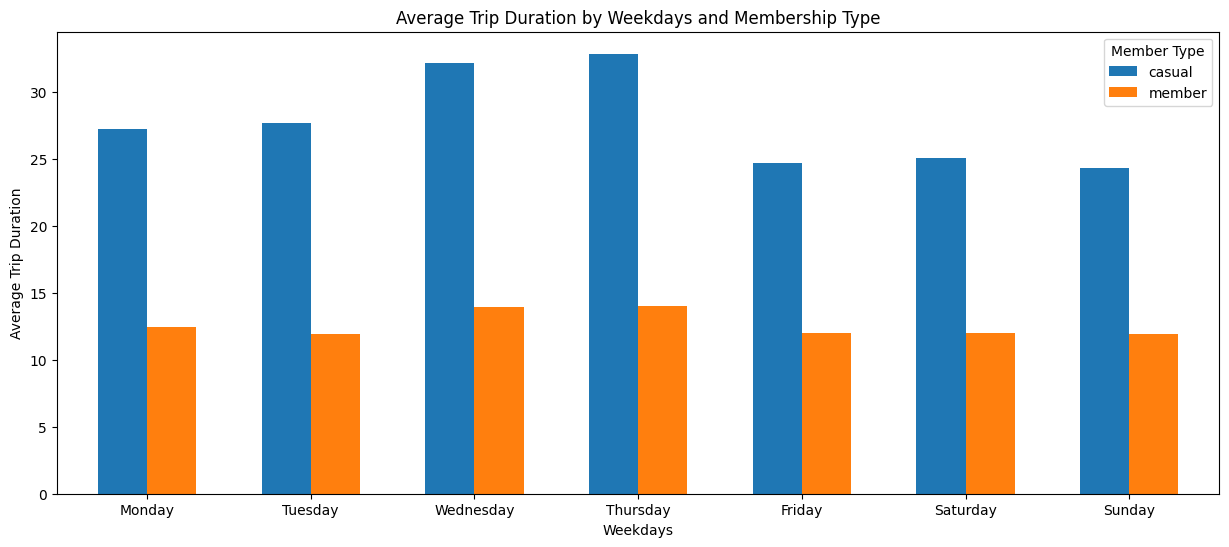

In [174]:
Daily_avg_trips.plot(kind="bar",figsize=(15, 6), width=0.6)
plt.xticks([0,1,2,3,4,5,6],["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=0)
plt.xlabel("Weekdays")
plt.ylabel("Average Trip Duration")
plt.title("Average Trip Duration by Weekdays and Membership Type")
plt.legend(title="Member Type")
plt.show()

<b>Average Trip Duration by Month and Membership Type</b>

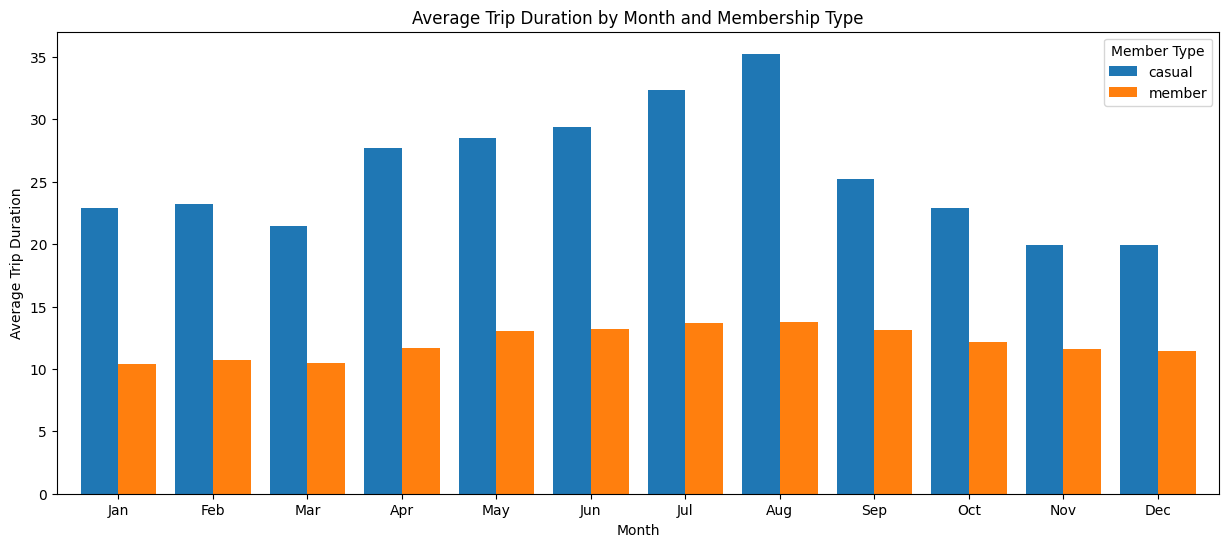

In [175]:
Monthly_avg_trip.plot(kind="bar", figsize=(15, 6), width=0.8)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], rotation=0)
plt.xlabel("Month")
plt.ylabel("Average Trip Duration")
plt.title("Average Trip Duration by Month and Membership Type")
plt.legend(title = "Member Type")
plt.show()


<b>Total Trips by Hour and Membership Type</b>

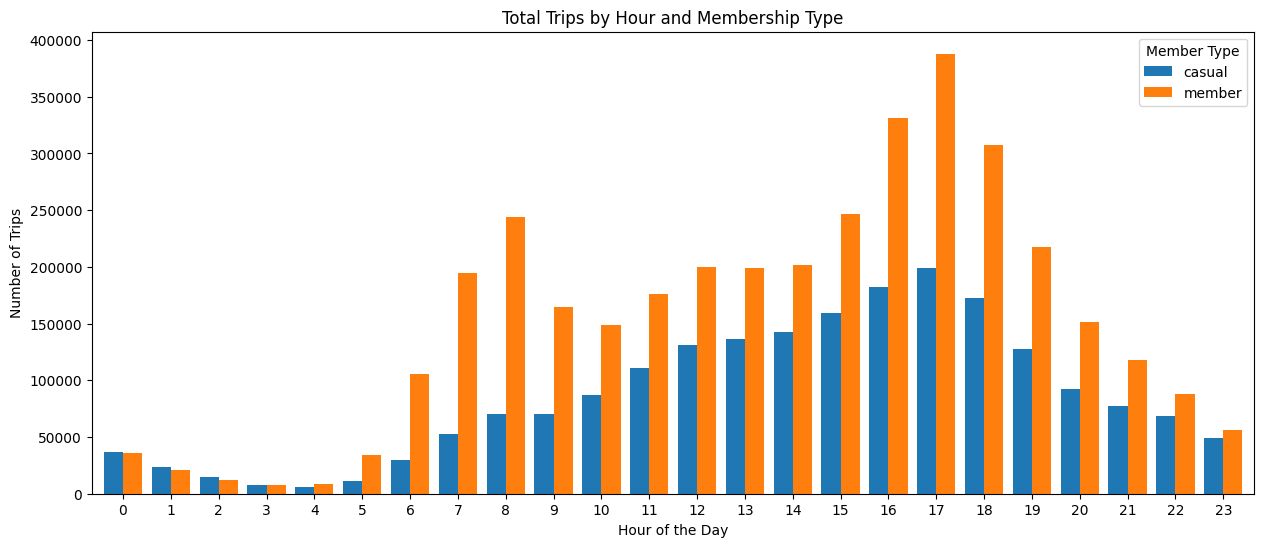

In [176]:
#Plot graph
Hourly_trips.plot(kind='bar', figsize=(15, 6), width=0.8)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Total Trips by Hour and Membership Type")
plt.legend(title="Member Type")
plt.xticks(rotation=0)
plt.show()

#### Analysis Summary

<b>Data-Driven Insights</b>

<b>Casuals</b>

- Take rides for longer duration on an average than members.
- Rent more bikes during afternoon and evening.
- Rent bikes for even longer duration during weekends.
- Most active during the summer season.
- Least active during winter season.

<b>Members</b>

- Take more total number of rides than casuals but have lower average ride duration.
- Rent bikes more during morning and evening rush hours.
- Rent more bikes during weekdays and less on weekends.
- Have no favorite time period. They are consistently active through out the year.

<b>Speculated Insights</b>

Using the above mentioned data driven insights, we can speculate qualitative insights about the behaviour of each of the user type as mentioned below:

<b>Casuals</b>

- Use bikes mostly for leisure activities.
- Don’t use bikes regularly but keep it as an alternative transport.
- Don’t have the requirements of the perks that the membership offers.

<b>Members</b>

- Use bikes to commute to work regularly.
- Use bikes as a main source of transport for daily commuting.
- Have enough regular usage to justify paying for an annual membership.

#### Deliverable: Acting on insights

<b>Collect additional data:</b>

Building an effective marketing campaign requires time, effort and money and after putting in all of the work, we don’t want it to perform poorly. Keeping this in mind, additional quantitative and qualitative data should be collected to give us an even better understanding about the needs of our users and also provide us more confidence regarding our marking strategies by confirming our current speculations.

To understand different users’ behaviour, we need qualitative data which can be gathered by surveying our customers and finding out about things such as the features that they like the most and the features that want to be improved or added, their main purpose of using bikes and provide them a list of external factors to choose from that might affect their decision about using a bike.

To gain further quantitative insights, we need more data variables such as age, gender, financial data, availability of bikes.

<b>Act on current insights:</b>

These are the recommended steps to move forward with based on the insights gained from currently available data. Moving forward with these strategies have some risk involved and might not guarantee 100% success.

- Dynamic pricing: Instead of a single static price throughout the day, introduce dynamic pricing where the price depends on the demand. This will make the prices higher during peak hours. Relieve users with membership from this dynamic pricing model so that there is a clear monetary benefit of buying a membership.

- New membership models: There are only two pricing models as of now which consists of single day passes and annual memberships. Provide users with more options by adding new subscriptions such as monthly subscriptions or a pricing model where users pay depending on the duration of rental or distance traveled. This will help the users who use bikes frequently but not regularly enough to justify paying for an annual membership.

- Additional membership benefits: Provide more benefits of buying a membership such as a certain number of free rides per month and reserved rides at docking stations. Casual users tend to ride for longer hence new benefits could be added which would incentivise longer rides.

- More user engagement: New features which would display metrics such as calories burnt and carbon emissions saved can be added to the cyclistic app. This will help users have a sense of achievement after finishing a ride and will encourage and motivate them to ride more.